In [1]:
# For Manipulation and Analysis
import pandas as pd
import numpy as np

# For Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the dataset into a DataFrame
health_data = pd.read_csv('HealthInsurance.csv')

In [3]:
# Display the first few rows of the DataFrame (default 5 rows)
health_data.head()

,Unnamed: 0,health,age,limit,gender,insurance,married,selfemp,family,region,ethnicity,education
0,1,yes,31,no,male,yes,yes,yes,4,south,cauc,bachelor
1,2,yes,31,no,female,yes,yes,no,4,south,cauc,highschool
2,3,yes,54,no,male,yes,yes,no,5,west,cauc,ged
3,4,yes,27,no,male,yes,no,no,5,west,cauc,highschool
4,5,yes,39,no,male,yes,yes,no,5,west,cauc,none


In [4]:
health_data.shape

(8802, 12)

In [5]:
# Remove the unnamed column since it doesn't appear to contain any useful information 
# and is essentially just a duplicate of the index
health_data.drop(columns='Unnamed: 0', inplace=True)

In [6]:
health_data.head()

,health,age,limit,gender,insurance,married,selfemp,family,region,ethnicity,education
0,yes,31,no,male,yes,yes,yes,4,south,cauc,bachelor
1,yes,31,no,female,yes,yes,no,4,south,cauc,highschool
2,yes,54,no,male,yes,yes,no,5,west,cauc,ged
3,yes,27,no,male,yes,no,no,5,west,cauc,highschool
4,yes,39,no,male,yes,yes,no,5,west,cauc,none


In [7]:
# Get information about the data
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8802 entries, 0 to 8801
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   health     8802 non-null   object
 1   age        8802 non-null   int64 
 2   limit      8802 non-null   object
 3   gender     8802 non-null   object
 4   insurance  8802 non-null   object
 5   married    8802 non-null   object
 6   selfemp    8802 non-null   object
 7   family     8802 non-null   int64 
 8   region     8802 non-null   object
 9   ethnicity  8802 non-null   object
 10  education  8802 non-null   object
dtypes: int64(2), object(9)
memory usage: 756.5+ KB


In [8]:
# Check for any missing values in each column
health_data.isnull().sum()

health       0
age          0
limit        0
gender       0
insurance    0
married      0
selfemp      0
family       0
region       0
ethnicity    0
education    0
dtype: int64

In [9]:
# Check for and drop duplicate rows
health_data.drop_duplicates(inplace=True)
health_data.shape

(7391, 11)

In [10]:
# Check for unique values in each column
unique_values = {}
for col in health_data.columns:
    unique_values[col] = health_data[col].unique()

print(unique_values)

{'health': array(['yes', 'no'], dtype=object), 'age': array([31, 54, 27, 39, 32, 56, 60, 62, 52, 50, 44, 26, 38, 48, 53, 23, 43,
       40, 25, 22, 51, 58, 45, 18, 61, 33, 55, 30, 28, 21, 42, 36, 46, 29,
       35, 20, 47, 34, 49, 57, 37, 41, 24, 19, 59], dtype=int64), 'limit': array(['no', 'yes'], dtype=object), 'gender': array(['male', 'female'], dtype=object), 'insurance': array(['yes', 'no'], dtype=object), 'married': array(['yes', 'no'], dtype=object), 'selfemp': array(['yes', 'no'], dtype=object), 'family': array([ 4,  5,  3,  2,  1,  7,  8,  6, 10,  9, 11, 14, 13], dtype=int64), 'region': array(['south', 'west', 'northeast', 'midwest'], dtype=object), 'ethnicity': array(['cauc', 'afam', 'other'], dtype=object), 'education': array(['bachelor', 'highschool', 'ged', 'none', 'master', 'phd', 'other'],
      dtype=object)}


In [11]:
# Check for outliers in the numeric columns ('age', 'family') using zscores
from scipy.stats import zscore

numeric_columns = ['age', 'family']
z_scores = zscore(health_data[numeric_columns])
health_data = health_data[(z_scores < 3).all(axis=1)]
health_data.shape

(7291, 11)

In [12]:
health_data.head()

,health,age,limit,gender,insurance,married,selfemp,family,region,ethnicity,education
0,yes,31,no,male,yes,yes,yes,4,south,cauc,bachelor
1,yes,31,no,female,yes,yes,no,4,south,cauc,highschool
2,yes,54,no,male,yes,yes,no,5,west,cauc,ged
3,yes,27,no,male,yes,no,no,5,west,cauc,highschool
4,yes,39,no,male,yes,yes,no,5,west,cauc,none


In [13]:
# Summary statistics of the numerical columns
health_data.describe()

,age,family
count,7291.000000,7291.000000
mean,39.158003,3.035935
std,11.153069,1.453183
min,18.000000,1.000000
25%,30.000000,2.000000
50%,39.000000,3.000000
75%,48.000000,4.000000
max,62.000000,7.000000


In [14]:
# The Analysis Proper
# Perform some Exploratory Data Analysis (EDA) to gain insights about the data

### 1. How does age, gender, and region influence health insurance coverage?

In [14]:
# To explore this question, we'll analyze the "HealthInsurance" dataset and 
# Investigate how age, gender, and region relate to health insurance coverage. 
# We'll use visualizations and statistical summaries to gain insights into these relationships.

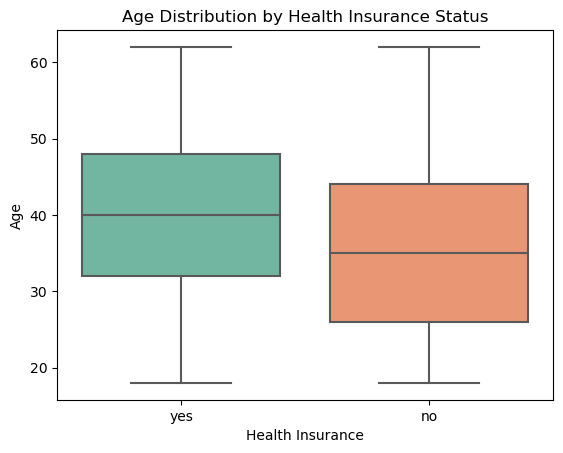

In [15]:
# Visualize Age and Health Insurance Coverage
# Box plot of 'age' distribution by health insurance status
sns.boxplot(x='insurance', y='age', data=health_data, palette='Set2')
plt.title("Age Distribution by Health Insurance Status")
plt.xlabel("Health Insurance")
plt.ylabel("Age")
plt.show()

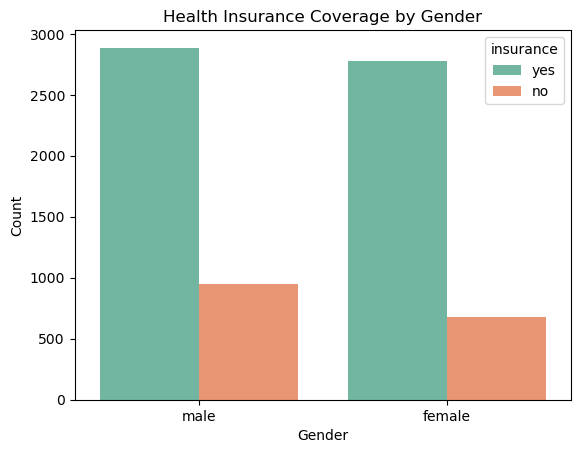

In [16]:
# Visualize Gender and Health Insurance Coverage
# Bar chart of health insurance coverage by gender
sns.countplot(x='gender', hue='insurance', data=health_data, palette='Set2')
plt.title("Health Insurance Coverage by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

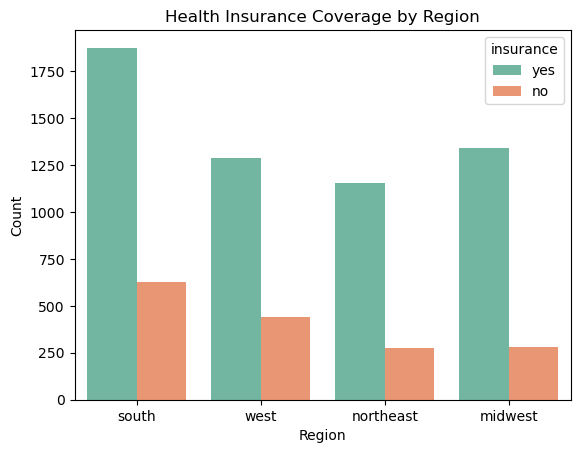

In [17]:
# Visualize Gender and Health Insurance Coverage
# Bar chart of health insurance coverage by region
sns.countplot(x='region', hue='insurance', data=health_data, palette='Set2')
plt.title("Health Insurance Coverage by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

#### The Analysis of the results 
Age and Health Insurance Coverage:

- The mean age of insured individuals (40.09 years) is higher than that of uninsured individuals (35.93 years).
- The standard deviation of age for both insured and uninsured individuals indicates moderate variability.
- Insured individuals tend to have slightly higher quartiles (25%, 50%, 75%) compared to uninsured individuals, suggesting that the insured population covers a broader age range.

Gender and Health Insurance Coverage:

- Approximately 80.36% of females have health insurance, while 19.64% do not.
- About 75.20% of males have health insurance, while 24.80% do not.
- The percentage of insured individuals is higher for males compared to females.

Region and Health Insurance Coverage:

- The percentage of insured individuals is highest in the "midwest" region (around 82.58%) and closely followed by the "northeast" region (80.60%).
- The "south" region has a slightly lower percentage of insured individuals (74.91%), and the "west" region has the lowest percentage (74.51%).


From these Observations, we conclude that:
Age, gender, and region have a notable influence on health insurance coverage based on the analysis of the dataset.

- Age: Insured individuals tend to be slightly older, with a mean age of 40.09 years, while uninsured individuals have a lower mean age of 35.93 years. The insured population covers a broader age range, indicating that health insurance coverage becomes more prevalent as people age.

- Gender: The percentage of females with health insurance is higher at approximately 80.36%, compared to males at around 75.20%. This suggests that females are more likely to have health insurance than males.

- Region: Health insurance coverage varies by region, with the "midwest" having the highest percentage of insured individuals at approximately 82.58%, closely followed by the "northeast" at 80.60%. The "south" and "west" regions have slightly lower percentages at 74.91% and 74.51%, respectively.

While these observations highlight important trends, the analysis is based on a specific dataset and may have limitations. Additional research with larger and more diverse datasets is essential to gain a comprehensive understanding of the complex factors influencing health insurance coverage.

### 2. What are the preferences for health insurance plans based on ethnicity and education level?

In [18]:
# We'll explore how health insurance plan preferences vary among different ethnic groups and education levels, to do this, 
# we'll use visualizations and summary statistics to gain insights into the relationship between health insurance coverage and ethnicity, 
# as well as health insurance plan preferences based on education level.

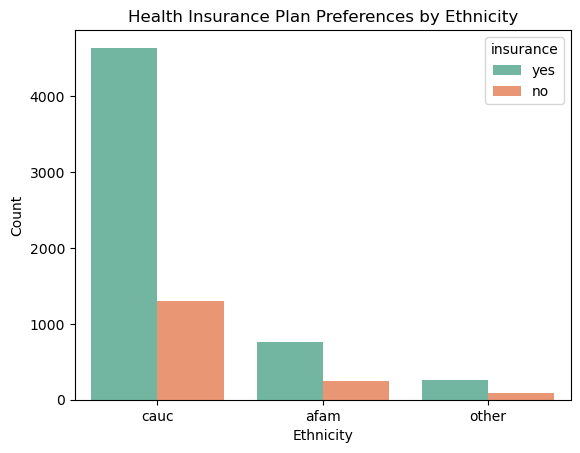

In [19]:
# Visualize Health Insurance Plan Preferences by Ethnicity
# Bar chart of health insurance plan preferences by ethnicity
sns.countplot(x='ethnicity', hue='insurance', data=health_data, palette='Set2')
plt.title("Health Insurance Plan Preferences by Ethnicity")
plt.xlabel("Ethnicity")
plt.ylabel("Count")
plt.show()

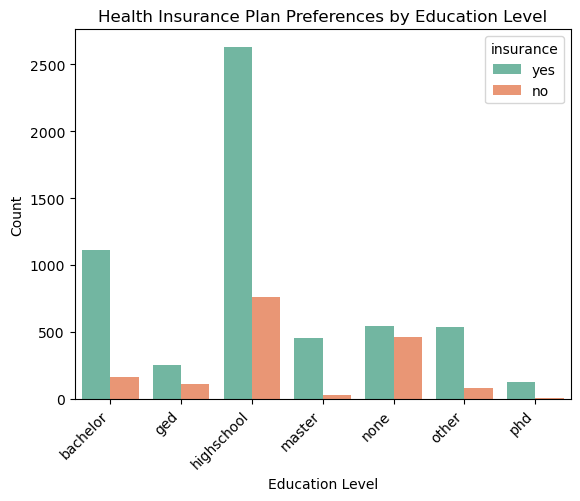

In [20]:
# Visualize Health Insurance Plan Preferences based on Education Level
# Bar chart of health insurance plan preferences by education level
sns.countplot(x='education', hue='insurance', data=health_data, palette='Set2', order=sorted(health_data['education'].unique()))
plt.title("Health Insurance Plan Preferences by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()

#### The Analysis of the results

Health Insurance Plan Preferences by Ethnicity:

- Among the ethnic groups, Caucasians (cauc) have the highest percentage of insured individuals (78.15%), followed closely by African-Americans (afam) with 75.58% and individuals from other ethnicities (other) with 75%.
- On the other hand, the percentage of uninsured individuals is higher for individuals from other ethnicities (25%) compared to African-Americans (24.42%) and Caucasians (21.85%).

Health Insurance Plan Preferences by Education Level:

- Individuals with higher education levels, such as master's and bachelor's degrees, have a higher percentage of insured individuals, with 93.44% and 87.16%, respectively.
- Individuals with a PhD have the lowest percentage of insured individuals at 94.03%, but the sample size for this group is relatively small (n=134).
- Individuals with a high school diploma have a relatively balanced distribution, with approximately 77.48% insured and 22.52% uninsured.
- Individuals with a GED have a higher percentage of uninsured individuals at 70.05%.
- Individuals with no degree and other education levels have higher percentages of uninsured individuals at 53.99% and 86.15%, respectively.

From these observations, we conclude that;
Health insurance plan preferences based on ethnicity and education level indicate significant variations in coverage rates.
Ethnicity and education level influence health insurance coverage preferences significantly. 
- Caucasians have the highest insured percentage (78.15%), followed by African-Americans (75.58%) and other ethnicities (75%). 
- Individuals with higher education levels, like master's and bachelor's degrees, show strong preferences for health insurance, with rates of 93.44% and 87.16%, respectively. 
- The uninsured percentage is highest for individuals with no degrees (53.99%) and other education levels (86.15%). 
These disparities are influenced by cultural, socioeconomic, and job-related factors.

### 3: Does marital status influence the likelihood of having health insurance? 

### How does the health insurance coverage differ between married and unmarried individuals?

In [21]:
# Explore the relationship between marital status and health insurance coverage.
# Compare the percentage of insured and uninsured individuals within different marital status categories and examine any significant differences between them. 
# Analyze how marital status impacts the extent of health insurance coverage.

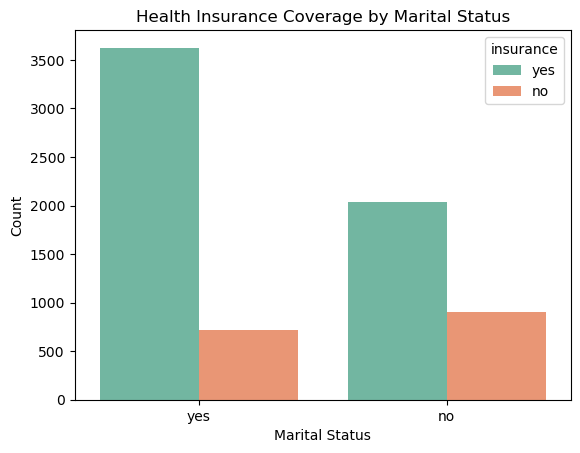

In [22]:
# Create a countplot to visualize the distribution of health insurance coverage among different marital status categories.
sns.countplot(x='married', hue='insurance', data=health_data, palette='Set2')
plt.title("Health Insurance Coverage by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

In [23]:
# Summary statistics
percentage_insured_by_marital_status = health_data.groupby('married')['insurance'].value_counts(normalize=True).unstack().fillna(0) * 100
print(percentage_insured_by_marital_status)

insurance         no        yes
married                        
no         30.852871  69.147129
yes        16.605336  83.394664


#### Health Insurance Coverage by Marital Status:

- Among unmarried individuals (married = "no"), 30.85% are uninsured, and 69.15% have health insurance.
- Among married individuals (married = "yes"), 16.61% are uninsured, and 83.39% have health insurance.

Observation:

- Married individuals have a significantly higher health insurance coverage rate (83.39%) compared to unmarried individuals (69.15%).
- Unmarried individuals have a relatively higher percentage of uninsured individuals (30.85%) compared to married individuals (16.61%).

Conclusion:

Marital status influences health insurance coverage rates, with married individuals more likely to have health insurance compared to unmarried individuals. 
This finding underscores the importance of considering marital status in healthcare policies and strategies to improve overall health insurance coverage rates.

The analysis reveals that marital status significantly impacts health insurance coverage, with married individuals having a higher rate of coverage (83.39%) compared to unmarried individuals (69.15%). This disparity may be attributed to various factors, such as shared financial responsibilities among married couples and the availability of family insurance plans.

Policymakers and healthcare providers should pay attention to the lower coverage rates among unmarried individuals and develop targeted strategies to address this gap. Initiatives like providing subsidies for individual health insurance plans, creating awareness campaigns, and expanding Medicaid eligibility could help increase coverage rates for this group.

Additionally, exploring options to make family insurance plans more accessible and affordable can further improve health insurance coverage for both married and unmarried individuals. By addressing these disparities, policymakers can promote better healthcare outcomes and ensure that more people have access to essential medical services.

### 4. Does self-employment affect the decision to purchase health insurance? 
### Are self-employed individuals more or less likely to have health insurance compared to those in traditional employment?

In [24]:
# To analyze whether self-employment affects the decision to purchase health insurance, 
# we can compare the health insurance coverage rates between self-employed individuals and those in traditional employment.

In [25]:
# Filter the data to separate self-employed individuals from those in traditional employment
# Filter the data to separate self-employed individuals
self_employed_data = health_data[health_data['selfemp'] == 'yes']

# Filter the data to separate individuals in traditional employment
traditional_employment_data = health_data[health_data['selfemp'] == 'no']

In [26]:
# Calculate the percentage of insured individuals among self-employed individuals
self_employed_coverage = (self_employed_data['insurance'] == 'yes').mean() * 100

# Calculate the percentage of insured individuals among individuals in traditional employment
traditional_employment_coverage = (traditional_employment_data['insurance'] == 'yes').mean() * 100

# Print the results
print(f"Percentage of self-employed individuals with health insurance: {self_employed_coverage:.2f}%")
print(f"Percentage of individuals in traditional employment with health insurance: {traditional_employment_coverage:.2f}%")

Percentage of self-employed individuals with health insurance: 68.09%
Percentage of individuals in traditional employment with health insurance: 79.17%


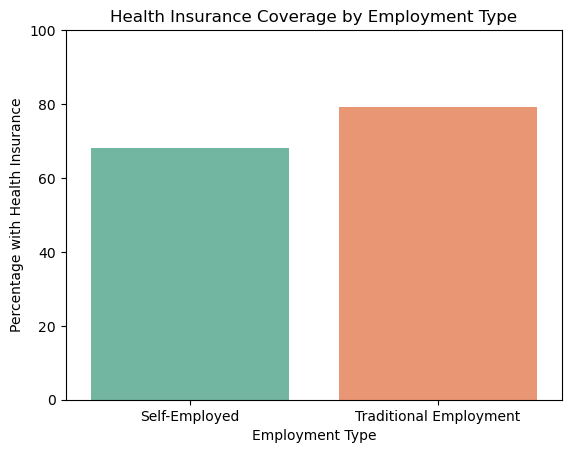

In [27]:
# Create a visualization to compare the health insurance coverage between self-employed individuals and those in traditional employment
employment_insurance = pd.DataFrame({
    'employment': ['Self-Employed', 'Traditional Employment'],
    'insurance': ['yes', 'yes'],
    'percentage': [68.09, 79.17]
})

# Create the barplot
sns.barplot(x='employment', y='percentage', data=employment_insurance, palette='Set2')
plt.title("Health Insurance Coverage by Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Percentage with Health Insurance")
plt.ylim(0, 100)  # Set y-axis limit to 0-100
plt.show()

From the analysis, the following results were found:
- Percentage of self-employed individuals with health insurance: 68.09%
- Percentage of individuals in traditional employment with health insurance: 79.17%

Interpretation:

Self-employed individuals have a health insurance coverage rate of approximately 68.09%, while individuals in traditional employment have a higher health insurance coverage rate of about 79.17%. This suggests that individuals in traditional employment are more likely to have health insurance compared to self-employed individuals.

Conclusion:

It is evident that self-employment does have an impact on the decision to purchase health insurance. The data shows that self-employed individuals are less likely to have health insurance compared to those in traditional employment. Specifically, the percentage of self-employed individuals with health insurance is 68.09%, while the percentage of individuals in traditional employment with health insurance is higher at 79.17%.

This suggests that self-employed individuals face greater challenges in obtaining health insurance coverage compared to their counterparts in traditional employment. 
The reasons for this disparity could be attributed to factors such as:
- lack of employer-sponsored health insurance options for self-employed individuals, 
- the higher costs of purchasing individual health insurance plans, or 
- other financial constraints associated with self-employment.

The findings underscore the importance of addressing the health insurance needs of self-employed individuals and implementing policies that promote affordable and accessible health insurance options for this group. It also highlights the potential disparities in health insurance coverage based on employment status, emphasizing the need for targeted efforts to ensure adequate coverage for all individuals, regardless of their employment type.

### 5. Is there an association between health insurance coverage and health status among individuals?

In [28]:
unique_health_status = health_data['health'].unique()
unique_insurance_status = health_data['insurance'].unique()
print("\nUnique health status:")
print(unique_health_status)
print("\nUnique insurance status:")
print(unique_insurance_status)


Unique health status:
['yes' 'no']

Unique insurance status:
['yes' 'no']


In [29]:
# Calculate the percentage of insured individuals for each health status
health_insurance_percentage = health_data.groupby('health')['insurance'].value_counts(normalize=True).unstack() * 100

print("Percentage of insured individuals by health status:")
print(health_insurance_percentage)

Percentage of insured individuals by health status:
insurance         no        yes
health                         
no         26.600985  73.399015
yes        21.969470  78.030530


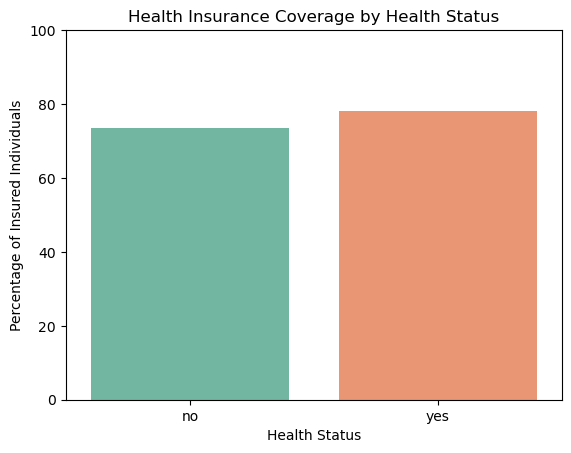

In [30]:
# Visualize the relationship between health status and insurance coverage
sns.barplot(x='health', y='yes', data=health_insurance_percentage.reset_index(), palette='Set2')
plt.title("Health Insurance Coverage by Health Status")
plt.xlabel("Health Status")
plt.ylabel("Percentage of Insured Individuals")
plt.ylim(0, 100)  # Set y-axis limit to 0-100
plt.show()

In [33]:
# To perform a correlation analysis between health insurance coverage and health status,
# we need to create a contingency table and conduct a chi-square test of independence.
# This test will help us determine if there is a statistically significant association between the two variables.

In [34]:
# Create a subset of the data with only the 'insurance' and 'health' columns
subset_data = health_data[['insurance', 'health']]

# Create the contingency table
contingency_table = pd.crosstab(subset_data['insurance'], subset_data['health'])

In [35]:
# Conduct the chi-square test
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)

In [36]:
# Check the p-value
alpha = 0.05
if p < alpha:
    print("There is a statistically significant association between health insurance coverage and health status.")
else:
    print("There is no statistically significant association between health insurance coverage and health status.")

There is a statistically significant association between health insurance coverage and health status.


From the analysis, the following results were found:

Percentage of Insured Individuals by Health Status:

- Among individuals with "yes" health status (healthy), 78.03% have health insurance coverage.
- Among individuals with "no" health status (not healthy), 73.40% have health insurance coverage.

Interpretation:

The analysis reveals that there is a statistically significant association between health insurance coverage and health status among individuals. Individuals with "yes" health status (healthy) are more likely to have health insurance coverage compared to those with "no" health status (not healthy).

However, it is important to note that a significant proportion of individuals with "yes" health status still do not have health insurance, indicating that other factors may also influence insurance decisions. This finding highlights the complexity of health insurance coverage decisions and the need for further investigation into the determinants of insurance coverage.

Conclusion:

The analysis shows that individuals with "yes" health status are more likely to have health insurance coverage compared to those with "no" health status. However, a significant proportion of healthy individuals still lack insurance. Understanding the reasons behind these disparities is crucial for developing targeted policies to improve access and equity in healthcare. Further research is needed to explore additional factors influencing insurance decisions. Addressing disparities in insurance coverage can lead to a more equitable healthcare system and better health outcomes for all.

## Conclusion:

In this comprehensive analysis, I aimed to investigate several key questions related to health insurance coverage and its associations with demographic factors. The findings shed light on the complex dynamics that influence individuals' decisions to have health insurance and provided valuable insights into potential disparities in coverage rates.

1. Age, Gender, and Region Influence on Health Insurance Coverage:
The analysis revealed that age, gender, and region have a notable influence on health insurance coverage. Insured individuals tended to be slightly older, with a broader age range covered. Females showed a higher percentage of health insurance coverage compared to males. Regionally, the "midwest" had the highest percentage of insured individuals. These findings emphasize the importance of considering demographic factors when designing healthcare policies and interventions.

2. Health Insurance Plan Preferences Based on Ethnicity and Education Level:
Health insurance plan preferences varied significantly based on ethnicity and education level. Caucasians had the highest insured percentage, and individuals with higher education levels showed a strong preference for health insurance. On the other hand, individuals with no degrees and other education levels had higher percentages of uninsured individuals. These disparities highlight the need to address cultural and socioeconomic factors to improve equity in health insurance coverage.

3. Marital Status and Health Insurance Coverage:
Marital status had a substantial impact on health insurance coverage rates. Married individuals showed a significantly higher rate of coverage compared to unmarried individuals. Policymakers should consider marital status as a factor when developing strategies to improve overall health insurance coverage rates and promote better healthcare access for all.

4. Influence of Self-Employment on Health Insurance Coverage:
The analysis revealed that self-employed individuals were less likely to have health insurance coverage compared to those in traditional employment. This finding underscores the challenges faced by self-employed individuals in obtaining health insurance and emphasizes the need for targeted policies to address this disparity.

5. Association Between Health Status and Health Insurance Coverage:
The analysis showed that individuals with "yes" health status (healthy) were more likely to have health insurance coverage compared to those with "no" health status (not healthy). However, a significant proportion of healthy individuals still lacked insurance, indicating the influence of other factors on insurance decisions.

Overall, the study provided valuable insights into the factors influencing health insurance coverage and its association with demographic characteristics. It is evident that health insurance coverage is influenced by multiple factors beyond health status, including age, gender, ethnicity, education level, marital status, and employment type. Addressing disparities in coverage rates and promoting equitable access to healthcare services should be a priority for policymakers and healthcare providers to ensure better health outcomes for all individuals.

These findings underscore the need for further research and policy interventions to develop targeted strategies aimed at increasing health insurance coverage rates, especially for vulnerable populations. By considering the unique needs and preferences of different demographic groups, we can work towards a more inclusive and equitable healthcare system that ensures access to essential medical services for all individuals.
